In [1]:
import numpy as np
import pandas as pd

In [2]:
def leer_csv_a_dataframe(file_path):
    """
    Reads a CSV file from the given file path and returns a DataFrame.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - pd.DataFrame: DataFrame containing the CSV data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        print("DataFrame created successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty.")
    except pd.errors.ParserError:
        print("Error: The CSV file could not be parsed.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [3]:
# definicion del ETL
# cargando datos en el DataFrame de pandas
df = leer_csv_a_dataframe('data/scrap_price.csv')
print(df.head())

DataFrame created successfully!
   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   

       carbody drivewheels enginelocation  wheelbase  ...  enginesize  \
0  convertible         rwd          front       88.6  ...         130   
1  convertible         rwd          front       88.6  ...         130   
2    hatchback         rwd          front       94.5  ...         152   
3        sedan         fwd          front       99.8  ...         109   
4        sedan         4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio hors

In [4]:
# paso de perfilado de datos
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.dtypes

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
print(
    "Columnas numericas: ", df.select_dtypes(include=['number']).shape[1],
    "Columnas de texto: ", df.select_dtypes(include=['object']).shape[1]
)

Columnas numericas:  16 Columnas de texto:  10


In [7]:
# Identifica la cuenta de NaN por columna
nan_conteo = df.isna().sum()

# Imprime las cuentas de NaN por columna
for columna, cuenta in nan_conteo.items():
    if cuenta > 0:
        print(f"Columna '{columna}' tiene {cuenta} NaN(s).")
    else:
        print(f"No hay NaN(s) en {columna}")

No hay NaN(s) en ID
No hay NaN(s) en symboling
No hay NaN(s) en name
No hay NaN(s) en fueltypes
No hay NaN(s) en aspiration
No hay NaN(s) en doornumbers
No hay NaN(s) en carbody
No hay NaN(s) en drivewheels
No hay NaN(s) en enginelocation
No hay NaN(s) en wheelbase
No hay NaN(s) en carlength
No hay NaN(s) en carwidth
No hay NaN(s) en carheight
No hay NaN(s) en curbweight
No hay NaN(s) en enginetype
No hay NaN(s) en cylindernumber
No hay NaN(s) en enginesize
No hay NaN(s) en fuelsystem
No hay NaN(s) en boreratio
No hay NaN(s) en stroke
No hay NaN(s) en compressionratio
No hay NaN(s) en horsepower
No hay NaN(s) en peakrpm
No hay NaN(s) en citympg
No hay NaN(s) en highwaympg
No hay NaN(s) en price


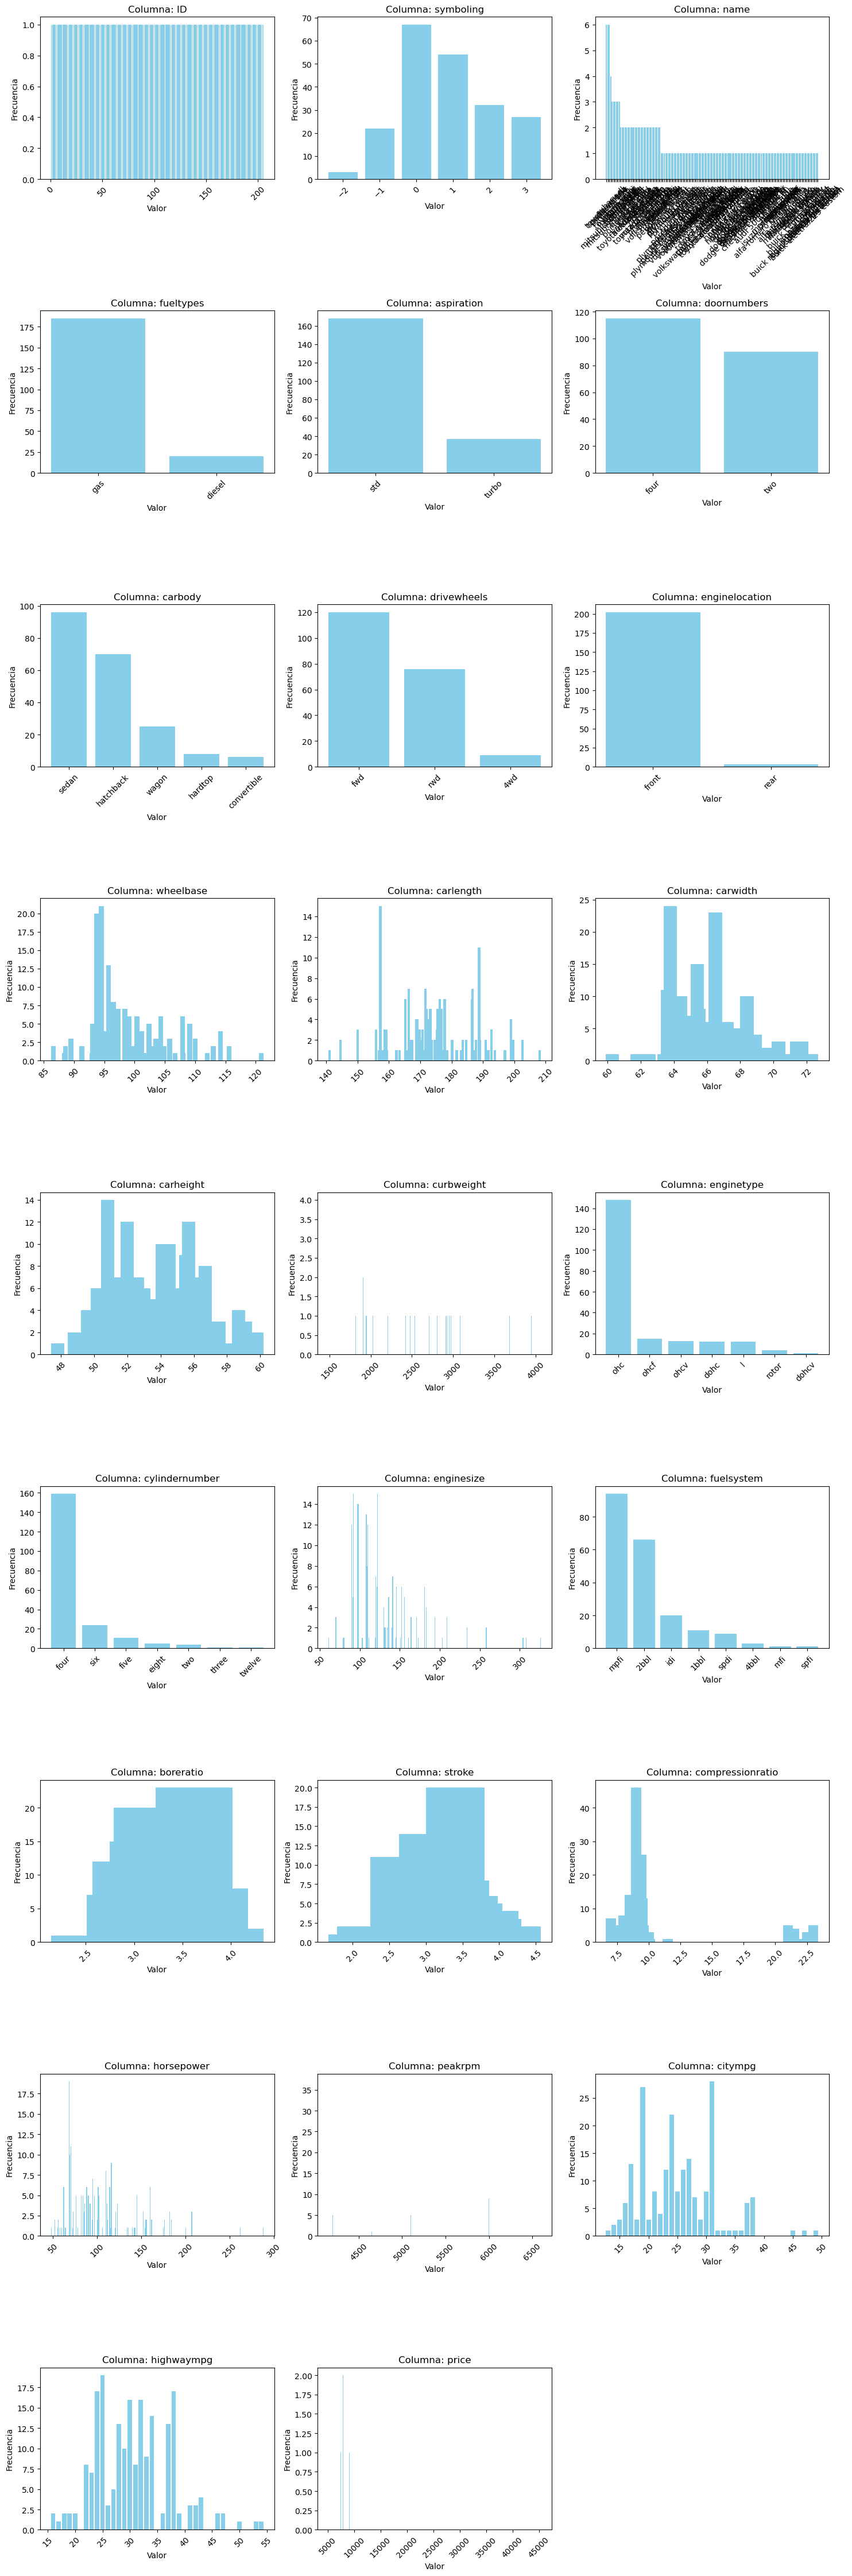

In [8]:
import matplotlib.pyplot as plt

def graficar_valores_unicos_por_columna(df, columnas=None, graficos_por_linea=3):
    """
    Genera gráficos de barras para los valores únicos de cada columna de un DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame a analizar.
        columnas (list): Lista de columnas a procesar (opcional, por defecto se procesan todas las columnas).
        graficos_por_linea (int): Número de gráficos por línea (default: 3).
    """
    # Usar todas las columnas si no se especifican
    if columnas is None:
        columnas = df.columns
    
    num_columnas = len(columnas)
    filas = (num_columnas + graficos_por_linea - 1) // graficos_por_linea  # Número total de filas necesarias
    
    # Crear los subplots
    fig, axes = plt.subplots(filas, graficos_por_linea, figsize=(15, 5 * filas))
    axes = axes.flatten()  # Aplanar para acceder a cada subplot de forma sencilla
    
    for i, columna in enumerate(columnas):
        # Contar valores únicos
        conteo = df[columna].value_counts()
        
        # Crear gráfico de barras
        axes[i].bar(conteo.index, conteo.values, color='skyblue')
        axes[i].set_title(f"Columna: {columna}")
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para claridad
    
    # Desactivar los gráficos vacíos (si hay menos columnas que subplots)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()
        
graficar_valores_unicos_por_columna(df)

# data is OK, is useful for analysis

Estas variables son del tipo cualitativo
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
enginetype           object
cylindernumber       object
fuelsystem           object

***Estas son cuantitativas:
ID                    int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64

Hay que analizar si pasamos estas variables a cuantitativas por medio de un mapeo, para ello hay que analizar los valores para ver si son una escala o tipos sintacticos
Fama4576


In [9]:
def listar_valores_unicos(df, columnas=None):
    """
    Lista los valores únicos de un grupo de columnas en un DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame a analizar.
        columnas (list): Lista de columnas a procesar (opcional, por defecto analiza todas las columnas).
    
    Returns:
        dict: Un diccionario donde las claves son los nombres de las columnas y los valores son las listas de valores únicos.
    """
    if columnas is None:
        columnas = df.columns  # Si no se especifican columnas, usa todas las columnas del DataFrame
    
    valores_unicos = {}
    
    for columna in columnas:
        valores_unicos[columna] = df[columna].unique().tolist()  # Obtiene los valores únicos y los convierte a lista
    
    return valores_unicos

# Imprime columnas cualitativas
columnas_a_analizar = []
for columna in df.select_dtypes(include=['object']):
    columnas_a_analizar.append(columna)

#columnas_a_analizar
valores_unicos = listar_valores_unicos(df, columnas_a_analizar)
valores_unicos

# Imprimir los valores únicos
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'name': ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick cent

Name no es un buen candidato a variable cualitativa
Las demas si se puede mapear a una escala de numeros

In [10]:
from sklearn.preprocessing import LabelEncoder

def convertir_columnas_cadenas_a_numeros(df, columnas, metodo='ordinal', mapeos_existentes=None):
    """
    Convierte columnas de cadenas de caracteres en un DataFrame a valores numéricos.
    
    Args:
        df (pd.DataFrame): DataFrame original.
        columnas (list): Lista de nombres de las columnas a convertir.
        metodo (str): Método de conversión ('ordinal' o 'manual').
        mapeos_existentes (dict): Diccionario de mapeos existentes (opcional para el método manual).
    
    Returns:
        pd.DataFrame: DataFrame con las columnas convertidas a valores numéricos.
        dict: Diccionario con los mapeos usados para cada columna.
    """
    nuevo_df = df.copy()
    mapeos = {}

    for columna in columnas:
        if metodo == 'manual':
            if mapeos_existentes is None or columna not in mapeos_existentes:
                raise ValueError(f"Debe proporcionar un mapeo para la columna '{columna}'.")
            mapeo = mapeos_existentes[columna]
            nuevo_df[columna] = nuevo_df[columna].map(mapeo)
            mapeos[columna] = mapeo
        
        elif metodo == 'ordinal':
            le = LabelEncoder()
            nuevo_df[columna] = le.fit_transform(nuevo_df[columna])
            mapeos[columna] = {categoria: indice for indice, categoria in enumerate(le.classes_)}
        
        else:
            raise ValueError("Método no soportado. Use 'ordinal' o 'manual'.")
    
    return nuevo_df, mapeos

columnas_a_convertir = ['fueltypes','aspiration','doornumbers','carbody', 'drivewheels','enginelocation','enginetype','cylindernumber','fuelsystem']
# Convertir las columnas a números
df_convertido, mapeos_usados = convertir_columnas_cadenas_a_numeros(df, columnas_a_convertir, metodo='ordinal')

print("\nDataFrame convertido:")
print(df_convertido, df_convertido.shape)
print("\nMapeos usados:")
print(mapeos_usados)


DataFrame convertido:
      ID  symboling                      name  fueltypes  aspiration  \
0      1          3        alfa-romero giulia          1           0   
1      2          3       alfa-romero stelvio          1           0   
2      3          1  alfa-romero Quadrifoglio          1           0   
3      4          2               audi 100 ls          1           0   
4      5          2                audi 100ls          1           0   
..   ...        ...                       ...        ...         ...   
200  201         -1           volvo 145e (sw)          1           0   
201  202         -1               volvo 144ea          1           1   
202  203         -1               volvo 244dl          1           0   
203  204         -1                 volvo 246          0           1   
204  205         -1               volvo 264gl          1           1   

     doornumbers  carbody  drivewheels  enginelocation  wheelbase  ...  \
0              1        0            2

### Podemos desarrollar la regresion lineal multivariada
### Conceptos Clave
1. **Ecuación de la regresión lineal multivariada**:
   \[
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
   \]
   - \(y\): Variable dependiente.
   - \(x_1, x_2, \dots, x_n\): Variables independientes.
   - \(\beta_0, \beta_1, \dots, \beta_n\): Coeficientes que se ajustan en el modelo.
   - \(\epsilon\): Error residual.

2. **Pasos básicos**:
   - Preparar los datos. (listo)
   - Dividirlos en conjuntos de entrenamiento y prueba.
   - Ajustar el modelo.
   - Evaluar el rendimiento.

In [11]:
# Separar variables independientes (X) y dependiente (y)
# price es la dependiente (y)
# las demas son independientes para este modelo (X)
# queremos decir entonces que el preciodepende de los valores de todas las anteriores
# quitar ID
X = df_convertido[[
    'symboling', #X[0]
    'fueltypes', #X[1]
    'aspiration', #X[2]
    'doornumbers', #X[3]
    'carbody', #X[4]
    'drivewheels', #X[5]
    'enginelocation', #X[6]
    'wheelbase', #X[7]
    'carlength', #X[8]
    'carwidth', #X[9]
    'carheight', #X[10]
    'curbweight', #X[11]
    'enginetype', #X[12]
    'cylindernumber', #X[13]
    'enginesize', #X[14]
    'fuelsystem', #X[15]
    'boreratio', #X[16]
    'stroke', #X[17]
    'compressionratio', #X[18]
    'horsepower', #X[19]
    'peakrpm', #X[20]
    'citympg', #X[21]
    'highwaympg' #X[22]
]]
y = df_convertido[['price']]
print("X ", X.shape, "y ", y.shape)

X  (205, 23) y  (205, 1)


In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# el 20% es dato de prueba y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
# Crear el modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos de entrenamiento (80%) ajutando a esta cantidad de datos
modelo.fit(X_train, y_train)

# los betas entrenados
print(f"Coeficientes beta:\n{modelo.coef_}, dim: {(modelo.coef_).shape}")
coef_train = modelo.coef_
# el intercepto entrenado
print(f"Intercepto: {modelo.intercept_}")

Coeficientes beta:
[[ 2.12749602e+02  3.61940620e+03  6.52215819e+02 -1.46667075e+03
  -1.00611703e+03  1.08200277e+03  1.09149135e+04  2.02902616e+02
  -5.58515415e+01  5.96057463e+02  9.22600077e+01  1.81002785e+00
   3.53705916e+02 -4.72594361e+02  9.39178289e+01 -6.58077922e+01
  -2.40020512e+03 -2.12618670e+03  4.37871859e+02  1.32874206e+01
   1.76352573e+00 -2.59081718e+02  8.30580089e+01]], dim: (1, 23)
Intercepto: [-55649.44599646]


In [14]:
# Predecir con el modelo, los datos de prueba
y_pred = modelo.predict(X_test)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
# mostrar los resultados ya ajustados
coef_adj = modelo.coef_
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Score:", modelo.score(X, y)) # el 87.21 % del modelo se explica con las variables elegidas
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Coeficientes: [[ 2.12749602e+02  3.61940620e+03  6.52215819e+02 -1.46667075e+03
  -1.00611703e+03  1.08200277e+03  1.09149135e+04  2.02902616e+02
  -5.58515415e+01  5.96057463e+02  9.22600077e+01  1.81002785e+00
   3.53705916e+02 -4.72594361e+02  9.39178289e+01 -6.58077922e+01
  -2.40020512e+03 -2.12618670e+03  4.37871859e+02  1.32874206e+01
   1.76352573e+00 -2.59081718e+02  8.30580089e+01]]
Intercepto: [-55649.44599646]
Score: 0.8721465807539228
Error cuadrático medio (MSE): 15916389.725439683
Coeficiente de determinación (R2): 0.7983838478445044


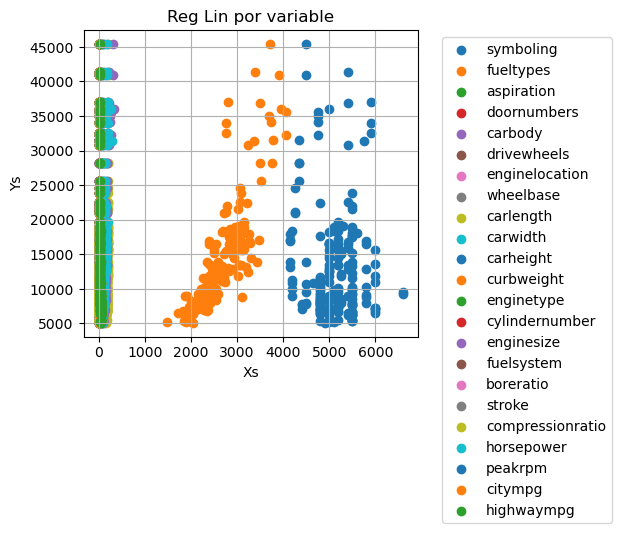

In [16]:
for column in X.columns:
    #print(column)
    plt.scatter(X[column], y, label=column, marker='o')

plt.title("Reg Lin por variable")
plt.xlabel("Xs")
plt.ylabel("Ys")
# poner la leyenda fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
# mostrar la gradilla
plt.grid(True)
plt.show()

In [17]:
# Comparar con tolerancia
comparacion_cercana = np.allclose(coef_adj, coef_train, atol=0.001)
print("\n¿Son cercanos los arreglos (con tolerancia)?")
print(comparacion_cercana)
# Verificar si tienen la misma forma
misma_forma = coef_adj.shape == coef_train.shape
print("\n¿Tienen la misma forma?")
print(misma_forma)
# Diferencia absoluta
diferencia = np.abs(coef_adj - coef_train)
print("\nDiferencia absoluta entre arreglos:")
print(diferencia)


¿Son cercanos los arreglos (con tolerancia)?
True

¿Tienen la misma forma?
True

Diferencia absoluta entre arreglos:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


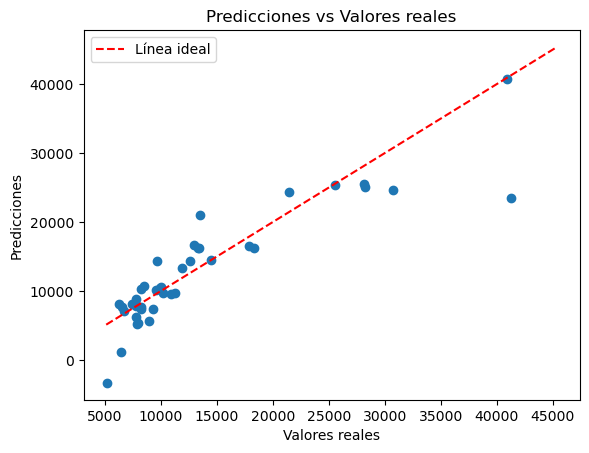

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Línea ideal")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.title("Predicciones vs Valores reales")
plt.show()

### Desarrollo del analisis con Matrices

In [19]:
def convertir_dataframe_a_matriz(df, incluir_columnas=None):
    """
    Convierte un DataFrame a una matriz (array de NumPy).
    
    Args:
        df (pd.DataFrame): El DataFrame a convertir.
        incluir_columnas (list): Lista de nombres de columnas a incluir en la matriz (opcional).
    
    Returns:
        np.ndarray: Matriz resultante.
    """
    if incluir_columnas is not None:
        matriz = df[incluir_columnas].to_numpy()
    else:
        matriz = df.to_numpy()
    
    return matriz

import numpy as np

def guardar_matriz_a_csv(matriz, nombre_archivo, encabezados=None, delimitador=","):
    """
    Guarda una matriz NumPy en un archivo CSV.
    
    Args:
        matriz (np.ndarray): La matriz a guardar en el archivo CSV.
        nombre_archivo (str): Nombre del archivo CSV donde se guardará la matriz.
        encabezados (list, optional): Lista de encabezados para las columnas (opcional).
        delimitador (str): Delimitador para separar los valores (por defecto: ",").
    
    Returns:
        None
    """
    with open(nombre_archivo, 'w', encoding='utf-8') as archivo:
        # Escribir encabezados si se proporcionan
        if encabezados is not None:
            archivo.write(delimitador.join(encabezados) + '\n')
        
        # Guardar la matriz fila por fila
        np.savetxt(archivo, matriz, delimiter=delimitador, fmt='%s')

    print(f"Matriz guardada exitosamente en el archivo: {nombre_archivo}")

encabezados_matriz = [
    'symboling', #X[1]
    'fueltypes', #X[2]
    'aspiration', #X[3]
    'doornumbers', #X[4]
    'carbody', #X[5]
    'drivewheels', #X[6]
    'enginelocation', #X[7]
    'wheelbase', #X[8]
    'carlength', #X[9]
    'carwidth', #X[10]
    'carheight', #X[11]
    'curbweight', #X[12]
    'enginetype', #X[13]
    'cylindernumber', #X[14]
    'enginesize', #X[15]
    'fuelsystem', #X[16]
    'boreratio', #X[17]
    'stroke', #X[18]
    'compressionratio', #X[19]
    'horsepower', #X[20]
    'peakrpm', #X[21]
    'citympg', #X[22]
    'highwaympg', #X[23]
    'price'#X[24]
]
# matriz sin la columna 'name'
matriz_modelo = convertir_dataframe_a_matriz(df_convertido[encabezados_matriz])
print("\nMatriz modelo:")
print(matriz_modelo)
guardar_matriz_a_csv(matriz_modelo, "matriz_ejemplo.csv", encabezados=encabezados_matriz)


Matriz modelo:
[[ 3.0000e+00  1.0000e+00  0.0000e+00 ...  2.1000e+01  2.7000e+01
   1.3495e+04]
 [ 3.0000e+00  1.0000e+00  0.0000e+00 ...  2.1000e+01  2.7000e+01
   1.6500e+04]
 [ 1.0000e+00  1.0000e+00  0.0000e+00 ...  1.9000e+01  2.6000e+01
   1.6500e+04]
 ...
 [-1.0000e+00  1.0000e+00  0.0000e+00 ...  1.8000e+01  2.3000e+01
   2.1485e+04]
 [-1.0000e+00  0.0000e+00  1.0000e+00 ...  2.6000e+01  2.7000e+01
   2.2470e+04]
 [-1.0000e+00  1.0000e+00  1.0000e+00 ...  1.9000e+01  2.5000e+01
   2.2625e+04]]
Matriz guardada exitosamente en el archivo: matriz_ejemplo.csv


In [20]:
def seleccionar_columnas_y_agregar_unos(df, columnas):
    """
    Selecciona columnas específicas de un DataFrame, las convierte en una matriz NumPy
    y agrega una columna inicial de 1s.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada.
        columnas (list): Lista de nombres de columnas a seleccionar.
    
    Returns:
        np.ndarray: Matriz con una columna inicial de 1s seguida de las columnas seleccionadas.
    """
    # Seleccionar las columnas específicas
    matriz = df[columnas].to_numpy()
    
    # Crear una columna de 1s
    columna_unos = np.ones((matriz.shape[0], 1))
    
    # Concatenar la columna de 1s con la matriz seleccionada
    matriz_final = np.hstack((columna_unos, matriz))
    
    return matriz_final

# todas las X, la ultima entrada es y en la matriz
matriz_modelo = seleccionar_columnas_y_agregar_unos(df_convertido, encabezados_matriz[:-1])

print("DataFrame original:")
print(df_convertido)
print("\nMatriz resultante con columna de 1s:")
print(matriz_modelo)

DataFrame original:
      ID  symboling                      name  fueltypes  aspiration  \
0      1          3        alfa-romero giulia          1           0   
1      2          3       alfa-romero stelvio          1           0   
2      3          1  alfa-romero Quadrifoglio          1           0   
3      4          2               audi 100 ls          1           0   
4      5          2                audi 100ls          1           0   
..   ...        ...                       ...        ...         ...   
200  201         -1           volvo 145e (sw)          1           0   
201  202         -1               volvo 144ea          1           1   
202  203         -1               volvo 244dl          1           0   
203  204         -1                 volvo 246          0           1   
204  205         -1               volvo 264gl          1           1   

     doornumbers  carbody  drivewheels  enginelocation  wheelbase  ...  \
0              1        0            2   

In [21]:
def imprimir_atributos_matriz(matriz):
    """
    Imprime las dimensiones y otros atributos de una matriz de NumPy.
    
    Args:
        matriz (np.ndarray): Matriz de NumPy cuyos atributos se van a imprimir.
    """
    print("Atributos de la matriz:")
    print(f"- Dimensiones (shape): {matriz.shape}")  # Número de filas y columnas
    print(f"- Número de dimensiones (ndim): {matriz.ndim}")  # Número de ejes (2D, 3D, etc.)
    print(f"- Número total de elementos (size): {matriz.size}")  # Total de elementos
    print(f"- Tipo de datos (dtype): {matriz.dtype}")  # Tipo de los elementos (int, float, etc.)
    print(f"- Bytes por elemento (itemsize): {matriz.itemsize} bytes")  # Tamaño en memoria de cada elemento
    print(f"- Total de memoria usada (nbytes): {matriz.nbytes} bytes")  # Memoria total usada

imprimir_atributos_matriz(matriz_modelo)
Xs = matriz_modelo
ys = df_convertido[['price']].to_numpy()

Atributos de la matriz:
- Dimensiones (shape): (205, 24)
- Número de dimensiones (ndim): 2
- Número total de elementos (size): 4920
- Tipo de datos (dtype): float64
- Bytes por elemento (itemsize): 8 bytes
- Total de memoria usada (nbytes): 39360 bytes


In [22]:
# generar transpuesta
Xs_T = Xs.T
imprimir_atributos_matriz(Xs_T)
print(Xs_T)

Atributos de la matriz:
- Dimensiones (shape): (24, 205)
- Número de dimensiones (ndim): 2
- Número total de elementos (size): 4920
- Tipo de datos (dtype): float64
- Bytes por elemento (itemsize): 8 bytes
- Total de memoria usada (nbytes): 39360 bytes
[[ 1.0e+00  1.0e+00  1.0e+00 ...  1.0e+00  1.0e+00  1.0e+00]
 [ 3.0e+00  3.0e+00  1.0e+00 ... -1.0e+00 -1.0e+00 -1.0e+00]
 [ 1.0e+00  1.0e+00  1.0e+00 ...  1.0e+00  0.0e+00  1.0e+00]
 ...
 [ 5.0e+03  5.0e+03  5.0e+03 ...  5.5e+03  4.8e+03  5.4e+03]
 [ 2.1e+01  2.1e+01  1.9e+01 ...  1.8e+01  2.6e+01  1.9e+01]
 [ 2.7e+01  2.7e+01  2.6e+01 ...  2.3e+01  2.7e+01  2.5e+01]]


In [23]:
# para capturar errores
def multiplicar_matrices(A, B):
    """
    Multiplica dos matrices usando NumPy.
    
    Args:
        A (np.ndarray): Primera matriz.
        B (np.ndarray): Segunda matriz.
    
    Returns:
        np.ndarray: Matriz resultante de la multiplicación.
    """
    if A.shape[1] != B.shape[0]:
        raise ValueError("El número de columnas de A debe coincidir con el número de filas de B.")
    return np.dot(A, B)  # O usar A @ B

Xs_TXs = multiplicar_matrices(Xs_T, Xs)
imprimir_atributos_matriz(Xs_TXs)
print(Xs_TXs)

Atributos de la matriz:
- Dimensiones (shape): (24, 24)
- Número de dimensiones (ndim): 2
- Número total de elementos (size): 576
- Tipo de datos (dtype): float64
- Bytes por elemento (itemsize): 8 bytes
- Total de memoria usada (nbytes): 4608 bytes
[[2.05000000e+02 1.71000000e+02 1.85000000e+02 3.70000000e+01
  9.00000000e+01 5.36000000e+02 2.72000000e+02 3.00000000e+00
  2.02451000e+04 3.56801000e+04 1.35111000e+04 1.10136000e+04
  5.23891000e+05 6.18000000e+02 4.34000000e+02 2.60160000e+04
  6.67000000e+02 6.82600000e+02 6.67360000e+02 2.07922000e+03
  2.13440000e+04 1.05065000e+06 5.17000000e+03 6.30400000e+03]
 [1.71000000e+02 4.59000000e+02 1.69000000e+02 2.50000000e+01
  1.59000000e+02 3.17000000e+02 2.21000000e+02 9.00000000e+00
  1.60736000e+04 2.86416000e+04 1.11433000e+04 8.85110000e+03
  4.06884000e+05 5.29000000e+02 4.02000000e+02 2.05820000e+04
  6.03000000e+02 5.60440000e+02 5.55980000e+02 1.55424000e+03
  1.85160000e+04 9.09550000e+05 4.25300000e+03 5.31900000e+03]
 [1.

In [24]:
# desarrollamos esta funcion para capturar errores en dimensiones y por lo tanto no calculamos inversa de matrices
# que no sean cuadradas
def calcular_inversa(matriz):
    """
    Calcula la inversa de una matriz usando NumPy.
    
    Args:
        matriz (np.ndarray): Matriz cuadrada de entrada.
    
    Returns:
        np.ndarray: Matriz inversa.
    """
    # Verificar si la matriz es cuadrada
    if matriz.shape[0] != matriz.shape[1]:
        raise ValueError("La matriz debe ser cuadrada.")
    
    # Verificar si el determinante es distinto de cero
    determinante = np.linalg.det(matriz)
    if determinante == 0:
        raise ValueError("La matriz no tiene inversa (determinante = 0).")
    
    # Calcular la inversa
    inversa = np.linalg.inv(matriz)
    return inversa

try:
    # Calcular la inversa de la matriz
    Xs_TXs_1 = calcular_inversa(Xs_TXs)

    print("Matriz original:")
    print(Xs_TXs)

    print("\nMatriz inversa:")
    print(Xs_TXs_1)
    imprimir_atributos_matriz(Xs_TXs_1)

except ValueError as e:
    print(f"Error: {e}")

Matriz original:
[[2.05000000e+02 1.71000000e+02 1.85000000e+02 3.70000000e+01
  9.00000000e+01 5.36000000e+02 2.72000000e+02 3.00000000e+00
  2.02451000e+04 3.56801000e+04 1.35111000e+04 1.10136000e+04
  5.23891000e+05 6.18000000e+02 4.34000000e+02 2.60160000e+04
  6.67000000e+02 6.82600000e+02 6.67360000e+02 2.07922000e+03
  2.13440000e+04 1.05065000e+06 5.17000000e+03 6.30400000e+03]
 [1.71000000e+02 4.59000000e+02 1.69000000e+02 2.50000000e+01
  1.59000000e+02 3.17000000e+02 2.21000000e+02 9.00000000e+00
  1.60736000e+04 2.86416000e+04 1.11433000e+04 8.85110000e+03
  4.06884000e+05 5.29000000e+02 4.02000000e+02 2.05820000e+04
  6.03000000e+02 5.60440000e+02 5.55980000e+02 1.55424000e+03
  1.85160000e+04 9.09550000e+05 4.25300000e+03 5.31900000e+03]
 [1.85000000e+02 1.69000000e+02 1.85000000e+02 2.40000000e+01
  8.70000000e+01 4.76000000e+02 2.41000000e+02 3.00000000e+00
  1.81573000e+04 3.20399000e+04 1.21625000e+04 9.89690000e+03
  4.65915000e+05 5.63000000e+02 3.97000000e+02 2.33

In [25]:
# obtener los coeficientes lineales
betas = multiplicar_matrices(Xs_T, ys)
imprimir_atributos_matriz(betas)
# sacar el intercepto
b0 = betas[0]
tmp = betas[1:]
betas = tmp
print("Intercepto ", b0)
print(betas)
print((modelo.coef_).T)

Atributos de la matriz:
- Dimensiones (shape): (24, 1)
- Número de dimensiones (ndim): 2
- Número total de elementos (size): 24
- Tipo de datos (dtype): float64
- Bytes por elemento (itemsize): 8 bytes
- Total de memoria usada (nbytes): 192 bytes
Intercepto  [2721725.667]
[[2.10800100e+06]
 [2.40496267e+06]
 [6.03032167e+05]
 [1.16909317e+06]
 [6.99874533e+06]
 [4.13516000e+06]
 [1.03584000e+05]
 [2.74458925e+08]
 [4.87445423e+08]
 [1.82037637e+08]
 [1.46699609e+08]
 [7.66436050e+09]
 [8.28953100e+06]
 [5.72626117e+06]
 [4.04731766e+08]
 [1.05840563e+07]
 [9.30685385e+06]
 [8.90094711e+06]
 [2.80452823e+07]
 [3.35459548e+08]
 [1.38828930e+10]
 [6.13291832e+07]
 [7.58672187e+07]]
[[ 2.12749602e+02]
 [ 3.61940620e+03]
 [ 6.52215819e+02]
 [-1.46667075e+03]
 [-1.00611703e+03]
 [ 1.08200277e+03]
 [ 1.09149135e+04]
 [ 2.02902616e+02]
 [-5.58515415e+01]
 [ 5.96057463e+02]
 [ 9.22600077e+01]
 [ 1.81002785e+00]
 [ 3.53705916e+02]
 [-4.72594361e+02]
 [ 9.39178289e+01]
 [-6.58077922e+01]
 [-2.400

In [26]:
# Comparar con tolerancia
comparacion_cercana = np.allclose((modelo.coef_).T, betas, atol=0.001)
print("\n¿Son cercanos los arreglos (con tolerancia)?")
print(comparacion_cercana)
# Verificar si tienen la misma forma
misma_forma = (modelo.coef_).T.shape == betas.shape
print("\n¿Tienen la misma forma?")
print(misma_forma)
# Diferencia absoluta
diferencia = np.abs((modelo.coef_).T - betas)
print("\nDiferencia absoluta entre arreglos:")
print(diferencia)


¿Son cercanos los arreglos (con tolerancia)?
False

¿Tienen la misma forma?
True

Diferencia absoluta entre arreglos:
[[2.10778825e+06]
 [2.40134326e+06]
 [6.02379951e+05]
 [1.17055984e+06]
 [6.99975145e+06]
 [4.13407800e+06]
 [9.26690865e+04]
 [2.74458722e+08]
 [4.87445479e+08]
 [1.82037041e+08]
 [1.46699516e+08]
 [7.66436050e+09]
 [8.28917730e+06]
 [5.72673376e+06]
 [4.04731672e+08]
 [1.05841221e+07]
 [9.30925406e+06]
 [8.90307330e+06]
 [2.80448444e+07]
 [3.35459534e+08]
 [1.38828930e+10]
 [6.13294423e+07]
 [7.58671356e+07]]


In [27]:
def promedio_columnas_seleccionadas(matriz, columnas):
    """
    Calcula el promedio de una selección de columnas en una matriz.
    
    Args:
        matriz (np.ndarray): Matriz NumPy de entrada.
        columnas (list): Lista de índices de las columnas a incluir.
    
    Returns:
        list: Lista con los promedios de las columnas seleccionadas.
    """
    # Seleccionar las columnas especificadas
    matriz_seleccionada = matriz[:, columnas]
    
    # Calcular el promedio de cada columna seleccionada
    promedios = matriz_seleccionada.mean(axis=0)
    
    # Convertir a lista y retornar
    return promedios.tolist()

# matriz con la columna 'name'
matriz_completa = convertir_dataframe_a_matriz(df_convertido[encabezados_matriz])
print("\nMatriz modelo:")
print(matriz_completa)
# creamos una lista de numeros consecutivos y luego lo pasamos a la funcion, y esta al ultimo
lista_columnas_promedio = promedio_columnas_seleccionadas(matriz_completa, np.arange(0, 23, 1))
print(lista_columnas_promedio)
# vector de medias
y_mean = lista_columnas_promedio.pop(-1)
print(f"y media = {y_mean}")


Matriz modelo:
[[ 3.0000e+00  1.0000e+00  0.0000e+00 ...  2.1000e+01  2.7000e+01
   1.3495e+04]
 [ 3.0000e+00  1.0000e+00  0.0000e+00 ...  2.1000e+01  2.7000e+01
   1.6500e+04]
 [ 1.0000e+00  1.0000e+00  0.0000e+00 ...  1.9000e+01  2.6000e+01
   1.6500e+04]
 ...
 [-1.0000e+00  1.0000e+00  0.0000e+00 ...  1.8000e+01  2.3000e+01
   2.1485e+04]
 [-1.0000e+00  0.0000e+00  1.0000e+00 ...  2.6000e+01  2.7000e+01
   2.2470e+04]
 [-1.0000e+00  1.0000e+00  1.0000e+00 ...  1.9000e+01  2.5000e+01
   2.2625e+04]]
[0.8341463414634146, 0.9024390243902439, 0.18048780487804877, 0.43902439024390244, 2.6146341463414635, 1.326829268292683, 0.014634146341463415, 98.75658536585367, 174.04926829268288, 65.90780487804878, 53.72487804878049, 2555.5658536585365, 3.0146341463414634, 2.1170731707317074, 126.90731707317073, 3.2536585365853656, 3.329756097560975, 3.255414634146341, 10.142536585365855, 104.1170731707317, 5125.121951219512, 25.21951219512195, 30.75121951219512]
y media = 30.75121951219512


In [28]:
# generamos la ecuacion para calcular y_pred
def multiplicar_filas_por_lista(matriz, lista):
    """
    Multiplica las entradas de cada renglón de una matriz por una lista de números.
    
    Args:
        matriz (np.ndarray): Matriz NumPy de entrada.
        lista (list): Lista de números para multiplicar las entradas de cada renglón.
    
    Returns:
        list: Lista con los resultados (sumas de productos) de cada renglón.
    """
    # Verificar que la longitud de la lista coincida con el número de columnas de la matriz
    if matriz.shape[1] != len(lista):
        raise ValueError("La longitud de la lista debe coincidir con el número de columnas de la matriz.")
    
    # Multiplicar cada renglón por la lista (broadcasting)
    matriz_multiplicada = matriz * lista
    
    # Sumar las entradas de cada renglón y convertir a lista
    resultados = matriz_multiplicada.sum(axis=1).tolist()
    
    return resultados

# encabezados
encabezados_matriz = [
    'symboling', #X[1]
    'fueltypes', #X[2]
    'aspiration', #X[3]
    'doornumbers', #X[4]
    'carbody', #X[5]
    'drivewheels', #X[6]
    'enginelocation', #X[7]
    'wheelbase', #X[8]
    'carlength', #X[9]
    'carwidth', #X[10]
    'carheight', #X[11]
    'curbweight', #X[12]
    'enginetype', #X[13]
    'cylindernumber', #X[14]
    'enginesize', #X[15]
    'fuelsystem', #X[16]
    'boreratio', #X[17]
    'stroke', #X[18]
    'compressionratio', #X[19]
    'horsepower', #X[20]
    'peakrpm', #X[21]
    'citympg', #X[22]
    'highwaympg' #X[23]
]
# otros encabezados
otros_encabezados = ['Yis', 'Yi^', '(Yi-Yi^)^2', '(Yi-Yi_mean)^2', '(Yi^-Yi_mean)^2']

Xss = convertir_dataframe_a_matriz(df_convertido, encabezados_matriz)
# rows, cols
n, k = Xss.shape
print("Xa ", (Xss).shape, type(Xss))
print("betas ", betas.shape, type(betas))
guardar_matriz_a_csv(Xss, "Xss.csv", encabezados=encabezados_matriz)

#y_pred = multiplicar_filas_por_lista(Xs, betas)
print("yis ",ys.shape, type(ys))
guardar_matriz_a_csv(Xss, "ys.csv", encabezados=otros_encabezados[0])

y_pred = np.dot(Xss, betas)
print("yis^ ", y_pred.shape, type(y_pred))
guardar_matriz_a_csv(Xss, "ys_pred.csv", encabezados=otros_encabezados[1])

y_y_pred_2 = np.square(ys - y_pred)
print("(yi-yi^)^2 ", y_y_pred_2.shape, type(y_y_pred_2))
guardar_matriz_a_csv(Xss, "ys_ys_pred_2.csv", encabezados=otros_encabezados[2])

y_y_mean_2 = np.square(ys - y_mean)
print("(Yi-Yi_mean)^2 ", y_y_mean_2.shape, type(y_y_mean_2))
guardar_matriz_a_csv(Xss, "ys_y_mean_2.csv", encabezados=otros_encabezados[3])

y_pred_y_mean_2 = np.square(y_pred - y_mean)
print("(Yi^-Yi_mean)^2 ", y_pred_y_mean_2.shape, type(y_pred_y_mean_2))
guardar_matriz_a_csv(Xss, "ys_pred_y_mean_2.csv", encabezados=otros_encabezados[4])

# SSs
SSE = np.sum(y_y_pred_2)
SST = np.sum(y_y_mean_2)
SSR = np.sum(y_pred_y_mean_2)
print("SSE ", SSE)
print("SST ", SST)
print("SSR ", SSR)
R_2 = SSR/SST
R_2adj = 1-((n-1)/(n-(k+1)))*(SSE/SST)
print("R_2 vs r2", R_2, r2)
print("R_2", R_2)
print("R_2adj", R_2adj)

# varianza y covarianza
var_Xss = np.cov(Xss, rowvar=False)
print("Mat VarCov Xs ", var_Xss.shape, type(var_Xss))
guardar_matriz_a_csv(Xss, "matriz_var_cov.csv", encabezados=encabezados_matriz)
corr_Xss = np.corrcoef(Xss, rowvar=False)
print("Mat correl Xs ", corr_Xss.shape, type(corr_Xss))
guardar_matriz_a_csv(Xss, "matriz_corr.csv", encabezados=encabezados_matriz)

#print(datos)

Xa  (205, 23) <class 'numpy.ndarray'>
betas  (23, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: Xss.csv
yis  (205, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: ys.csv
yis^  (205, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: ys_pred.csv
(yi-yi^)^2  (205, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: ys_ys_pred_2.csv
(Yi-Yi_mean)^2  (205, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: ys_y_mean_2.csv
(Yi^-Yi_mean)^2  (205, 1) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: ys_pred_y_mean_2.csv
SSE  1.7055004859990198e+30
SST  48988004384.49591
SSR  1.705500486502137e+30
R_2 vs r2 3.481465530042915e+19 0.7983838478445044
R_2 3.481465530042915e+19
R_2adj -3.923861701211284e+19
Mat VarCov Xs  (23, 23) <class 'numpy.ndarray'>
Matriz guardada exitosamente en el archivo: matriz_var_cov.csv
Mat correl Xs  (23, 23) <class 'numpy.ndarray'>
Matriz guarda

In [29]:
# Comparar con tolerancia
comparacion_cercana = np.allclose(ys, y_pred, atol=0.001)
print("\n¿Son cercanos los arreglos (con tolerancia)?")
print(comparacion_cercana)
# Verificar si tienen la misma forma
misma_forma = ys.shape == y_pred.shape
print("\n¿Tienen la misma forma?")
print(misma_forma)
# Diferencia absoluta
diferencia = np.abs(ys - y_pred)
print("\nDiferencia absoluta entre arreglos:")
print(diferencia)


¿Son cercanos los arreglos (con tolerancia)?
False

¿Tienen la misma forma?
True

Diferencia absoluta entre arreglos:
[[8.91622597e+13]
 [8.91622597e+13]
 [9.12967180e+13]
 [9.44835547e+13]
 [9.82302728e+13]
 [9.57995582e+13]
 [9.83929076e+13]
 [9.92359943e+13]
 [1.00255245e+14]
 [9.99990656e+13]
 [9.90922742e+13]
 [9.90922688e+13]
 [8.00172480e+13]
 [8.04387867e+13]
 [8.26683301e+13]
 [1.00013098e+14]
 [1.01164981e+14]
 [1.02127084e+14]
 [8.23672355e+13]
 [8.95176657e+13]
 [8.97873357e+13]
 [9.09207182e+13]
 [9.09201223e+13]
 [9.28651429e+13]
 [9.16175486e+13]
 [9.17861716e+13]
 [9.17861716e+13]
 [9.33479752e+13]
 [8.90606361e+13]
 [9.12042998e+13]
 [7.99444563e+13]
 [9.74200594e+13]
 [9.06115585e+13]
 [9.83519432e+13]
 [9.84745730e+13]
 [9.88960312e+13]
 [9.90008077e+13]
 [9.78640112e+13]
 [9.82702223e+13]
 [9.83891617e+13]
 [9.89098467e+13]
 [9.96276452e+13]
 [9.41410445e+13]
 [8.47528235e+13]
 [8.95176727e+13]
 [8.97859221e+13]
 [9.05812028e+13]
 [9.74219782e+13]
 [9.74219782e+13]

In [30]:
print(var_Xss)

[[ 1.55078910e+00  7.19751315e-02 -2.87422286e-02  4.11406026e-01
  -6.37757054e-01 -2.88617886e-02  3.18507891e-02 -3.98909852e+00
  -5.49423960e+00 -6.22228599e-01 -1.64634385e+00 -1.47636083e+02
   6.61645146e-02  1.95982783e-01 -5.48603539e+00  2.28550933e-01
  -4.38641798e-02 -3.41128647e-03 -8.83008608e-01  3.49010043e+00
   1.62520325e+02 -2.91846007e-01  2.96771879e-01]
 [ 7.19751315e-02  8.84744142e-02 -4.60306074e-02  2.83357245e-02
  -3.77809660e-02 -2.18794835e-02  1.43472023e-03 -5.52295552e-01
  -7.80463893e-01 -1.49234816e-01 -2.06874701e-01 -3.36504065e+01
   2.59445242e-02  2.61836442e-02 -8.62027738e-01  2.48684840e-02
  -4.38665710e-03 -2.25573888e-02 -1.16298661e+00  1.92814443e+00
   6.76590148e+01 -4.98087040e-01 -3.92037303e-01]
 [-2.87422286e-02 -4.60306074e-02  1.48637016e-01 -6.09756098e-03
   2.08751793e-02  1.42515543e-02 -2.65423242e-03  5.98070301e-01
   1.11557389e+00  2.48584409e-01  8.22525108e-02  6.52208991e+01
  -4.18699187e-02 -4.08417025e-02  1.737

In [31]:
print(corr_Xss)

[[ 1.          0.19431094 -0.05986605  0.66407345 -0.59613526 -0.04167148
   0.21247094 -0.53195368 -0.35761152 -0.23291906 -0.5410382  -0.22769059
   0.05037243  0.19776151 -0.10578971  0.09116306 -0.13005136 -0.00873514
  -0.17851508  0.07087272  0.27360625 -0.03582263  0.034606  ]
 [ 0.19431094  1.         -0.40139723  0.19149054 -0.14785299 -0.13225748
   0.04006951 -0.30834586 -0.21267882 -0.23387981 -0.28463106 -0.21727532
   0.08269534  0.1106169  -0.06959429  0.04152912 -0.05445103 -0.24182882
  -0.98435606  0.16392617  0.47688264 -0.25596256 -0.19139191]
 [-0.05986605 -0.40139723  1.         -0.03179175  0.06302787  0.06646465
  -0.05719146  0.25761086  0.23453903  0.30056737  0.08731109  0.32490188
  -0.10296338 -0.13311916  0.1082174   0.28808645  0.2126142   0.22298218
   0.29554077  0.24168525 -0.18338283 -0.20236188 -0.25441647]
 [ 0.66407345  0.19149054 -0.03179175  1.         -0.68035769  0.09895445
   0.13775666 -0.44735674 -0.3985678  -0.20716822 -0.55220795 -0.197379

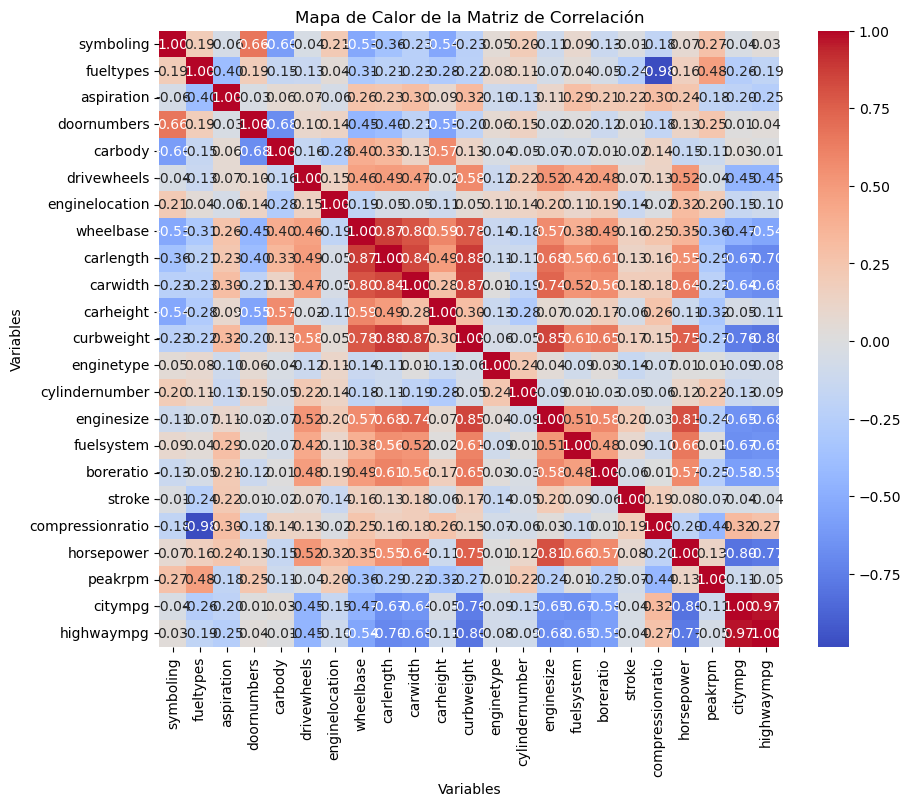

In [32]:
import seaborn as sns

# Dibujar el mapa de calor Matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(corr_Xss, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=encabezados_matriz, yticklabels=encabezados_matriz)

plt.title("Mapa de Calor de la Matriz de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

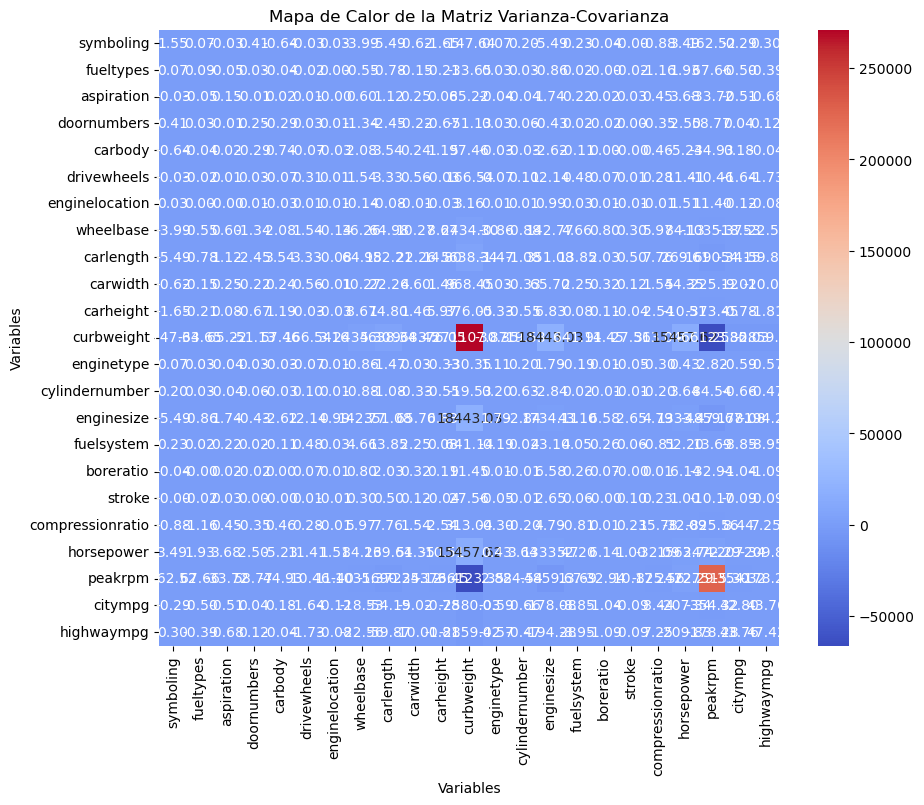

In [33]:
# Dibujar el mapa de calor Magtriz varianza-covarianza
plt.figure(figsize=(10, 8))
sns.heatmap(var_Xss, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=encabezados_matriz, yticklabels=encabezados_matriz)

plt.title("Mapa de Calor de la Matriz Varianza-Covarianza")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

### Metodo de componentes principales PCA

In [34]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
# encabezados
encabezados_matriz = [
    'symboling', #X[1]
    'fueltypes', #X[2]
    'aspiration', #X[3]
    'doornumbers', #X[4]
    'carbody', #X[5]
    'drivewheels', #X[6]
    'enginelocation', #X[7]
    'wheelbase', #X[8]
    'carlength', #X[9]
    'carwidth', #X[10]
    'carheight', #X[11]
    'curbweight', #X[12]
    'enginetype', #X[13]
    'cylindernumber', #X[14]
    'enginesize', #X[15]
    'fuelsystem', #X[16]
    'boreratio', #X[17]
    'stroke', #X[18]
    'compressionratio', #X[19]
    'horsepower', #X[20]
    'peakrpm', #X[21]
    'citympg', #X[22]
    'highwaympg' #X[23]
]
# Estandarizar los datos
scaler = StandardScaler()
#datos_estandarizados = scaler.fit_transform(df_convertido[encabezados_matriz])
datos_estandarizados = scaler.fit_transform(Xs)

In [36]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para ver como responde
datos_pca = pca.fit_transform(datos_estandarizados)
# Crear un DataFrame con los datos transformados
df_pca = pd.DataFrame(datos_pca, columns=['Componente1', 'Componente2'])

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Imprimir resultados
print("Varianza explicada por cada componente:")
print(varianza_explicada)

print("\nDatos transformados:")
print(df_pca)

Varianza explicada por cada componente:
[0.33583821 0.17972555]

Datos transformados:
     Componente1  Componente2
0      -0.718003     3.505142
1      -0.718003     3.505142
2       0.366667     2.279755
3      -0.166498     0.070601
4       0.693468     0.395555
..           ...          ...
200     3.105739    -0.739195
201     4.114074    -0.429500
202     3.613776     0.261677
203     2.961327    -3.637301
204     3.806757    -0.733225

[205 rows x 2 columns]


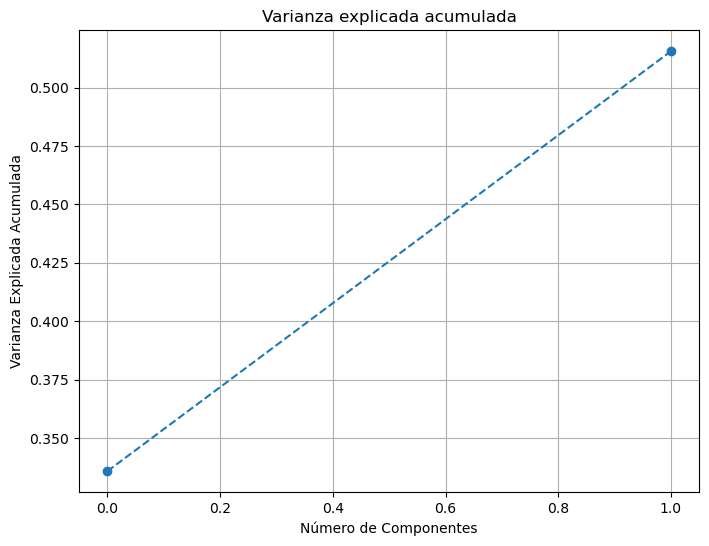

In [37]:
# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(varianza_explicada), marker='o', linestyle='--')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid(True)
plt.show()

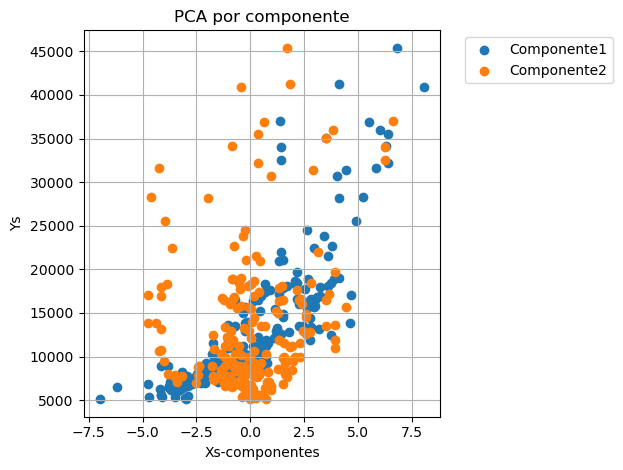

In [38]:
for column in df_pca.columns:
    #print(column)
    plt.scatter(df_pca[column], ys, label=column, marker='o')

plt.title("PCA por componente")
plt.xlabel("Xs-componentes")
plt.ylabel("Ys")
# poner la leyenda fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
# mostrar la gradilla
plt.grid(True)
plt.show()

notamos que explican poco, un poco mas de 50%, asi es que utilizamos otra variante de PCA, ahora con el porcentaje

Varianza explicada por cada componente:
[0.33583821 0.17972555 0.09618869 0.05930599 0.0484544  0.0443658
 0.04242197 0.03634292 0.02671523 0.0237077  0.02000093 0.01813988
 0.01595131 0.0136128 ]

Datos transformados:
     Componente1  Componente2  Componente3  Componente4  Componente5  \
0      -0.718003     3.505142     1.773910    -1.081809    -2.072106   
1      -0.718003     3.505142     1.773910    -1.081809    -2.072106   
2       0.366667     2.279755     0.567834     0.573321     1.581011   
3      -0.166498     0.070601    -0.763375    -0.640705     0.583782   
4       0.693468     0.395555    -1.460232    -1.624172    -0.325811   
..           ...          ...          ...          ...          ...   
200     3.105739    -0.739195    -1.426037     0.477502    -0.171396   
201     4.114074    -0.429500    -0.903433    -0.210534     0.307861   
202     3.613776     0.261677    -1.996714     2.093159     0.759687   
203     2.961327    -3.637301     2.830257     1.114536     2

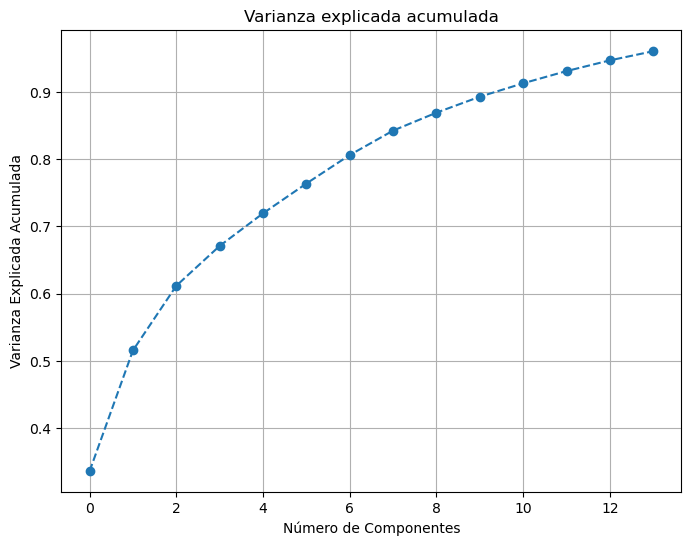

In [39]:
# podemos pedirle a la biblioteca que calcule el numero de componentes principales con el fin de mantener la
# varianza al 95%
# Aplicar PCA
pca = PCA(n_components=0.95)  # Reducir a 2 componentes principales para ver como responde
datos_pca = pca.fit_transform(datos_estandarizados)
# Crear un DataFrame con los datos transformados
df_pca = pd.DataFrame(datos_pca)
renglones, columnas = df_pca.shape
encabezados_componentes = [f"Componente{i}" for i in range(1, columnas + 1)]
df_pca.columns = encabezados_componentes

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Imprimir resultados
print("Varianza explicada por cada componente:")
print(varianza_explicada)

print("\nDatos transformados:")
print(df_pca)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(varianza_explicada), marker='o', linestyle='--')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid(True)
plt.show()

estos componenentes explican mas que el anterior de 2, por lo que 14 es un numero razonable sobre 25 que tiene la tabla

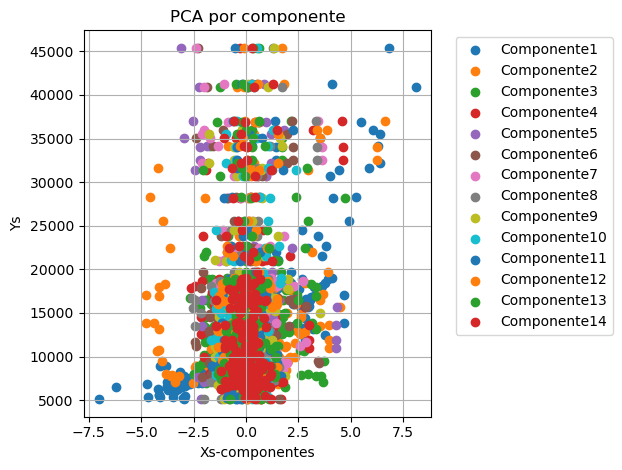

In [40]:
for column in df_pca.columns:
    #print(column)
    plt.scatter(df_pca[column], ys, label=column, marker='o')

plt.title("PCA por componente")
plt.xlabel("Xs-componentes")
plt.ylabel("Ys")
# poner la leyenda fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
# mostrar la gradilla
plt.grid(True)
plt.show()